In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task-1: Image Manipulation
# Read the image
image_path = "/content/image.jpg"  # Replace with your image path
image = cv2.imread(image_path)

In [4]:
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


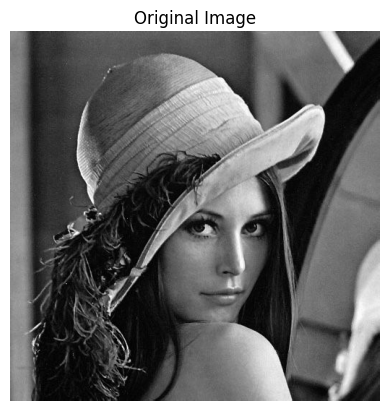

In [5]:
# Display the image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [6]:
# Extract image size
height, width, channels = image.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")

Image Size: 512x512, Channels: 3


In [7]:
# Calculate total pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

Total Pixels: 262144


In [8]:
# Convert RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)

True

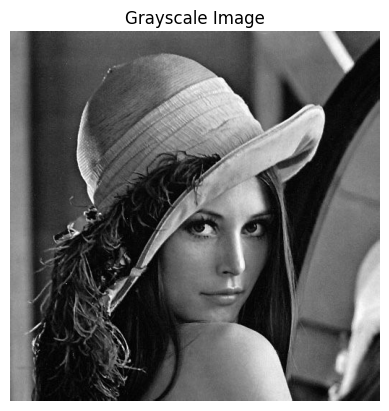

In [9]:
# Display Grayscale Image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [10]:
# Convert Grayscale to Binary using a threshold
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

True

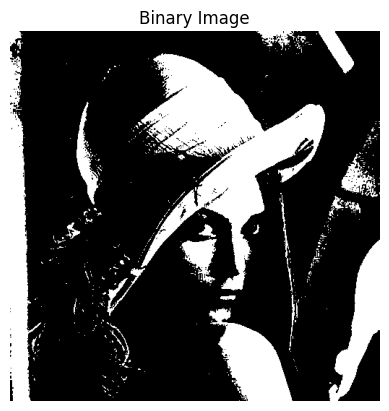

In [11]:
# Display Binary Image
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

In [12]:
# Task-2: Edge Detection
# Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

In [14]:
# Roberts Cross Operator
roberts_x = cv2.filter2D(gray_image, cv2.CV_32F, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(gray_image, cv2.CV_32F, np.array([[0, 1], [-1, 0]]))

# Compute magnitude
roberts_edge = cv2.magnitude(roberts_x, roberts_y)


In [15]:
# Canny Edge Detector
canny_edge = cv2.Canny(gray_image, 100, 200)

In [17]:
# Prewitt Operator
prewitt_x = cv2.filter2D(gray_image, cv2.CV_32F, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(gray_image, cv2.CV_32F, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)


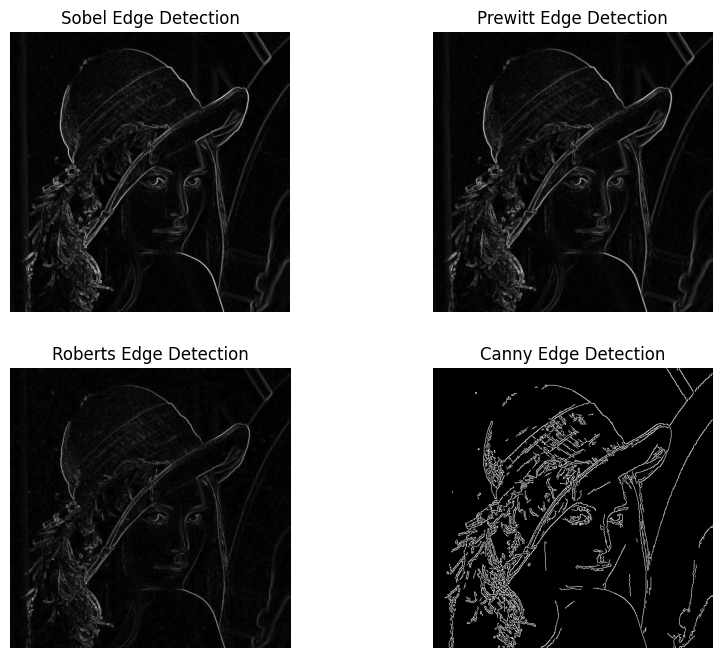

In [18]:
# Display Edge Detection Results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].imshow(sobel_edge, cmap='gray')
axes[0, 0].set_title("Sobel Edge Detection")
axes[0, 1].imshow(prewitt_edge, cmap='gray')
axes[0, 1].set_title("Prewitt Edge Detection")
axes[1, 0].imshow(roberts_edge, cmap='gray')
axes[1, 0].set_title("Roberts Edge Detection")
axes[1, 1].imshow(canny_edge, cmap='gray')
axes[1, 1].set_title("Canny Edge Detection")
for ax in axes.flat:
    ax.axis("off")
plt.show()

In [19]:
# Task-2: Image Segmentation
# Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

In [20]:
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [21]:
# Canny Edge Detection Segmentation
canny_segmentation = cv2.Canny(gray_image, 100, 200)

In [22]:
# Watershed Algorithm
gray_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
_, markers = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
markers = cv2.connectedComponents(markers)[1]
markers = cv2.watershed(image, markers)
watershed_segmentation = np.where(markers == -1, 255, 0).astype(np.uint8)

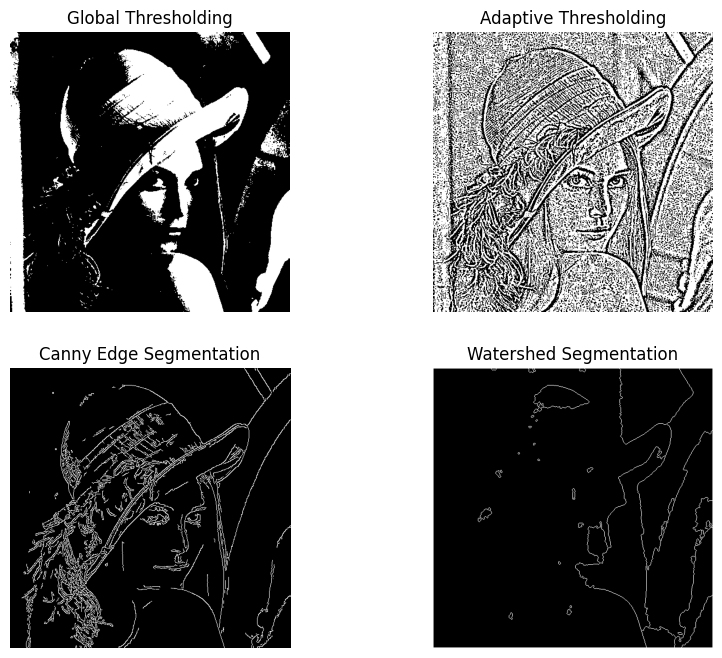

In [23]:

# Display Segmentation Results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].imshow(global_thresh, cmap='gray')
axes[0, 0].set_title("Global Thresholding")
axes[0, 1].imshow(adaptive_thresh, cmap='gray')
axes[0, 1].set_title("Adaptive Thresholding")
axes[1, 0].imshow(canny_segmentation, cmap='gray')
axes[1, 0].set_title("Canny Edge Segmentation")
axes[1, 1].imshow(watershed_segmentation, cmap='gray')
axes[1, 1].set_title("Watershed Segmentation")
for ax in axes.flat:
    ax.axis("off")
plt.show()